In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt

# !pip install wordcloud

In [2]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


In [3]:
dataset = pd.read_csv("IMDB Dataset.csv")
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Initial Data Processing
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
# Checking duplicate
dataset.drop_duplicates(keep="first", inplace=True)

In [6]:
dataset.shape

(49582, 2)

In [7]:
labels = {"negative" : 0, "positive" : 1}

# Feature and Target
X = dataset.review
Y = dataset.sentiment

target = Y.replace(labels).to_numpy()

C:\Users\Suresh\AppData\Local\Temp\ipykernel_6732\283642269.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target = Y.replace(labels).to_numpy()


In [8]:
target

array([1, 1, 1, ..., 0, 0, 0], shape=(49582,))

In [9]:
def text_processor(text):
    text = text.lower()

    # Removing urls 
    text = re.sub(r'(https?://\S+|www\.\S+)', "", text)
    # Removing HTML Tags
    text = re.sub(r"<.*?>", "", text)
    # Puncuation and special Char
    text = re.sub(r"[^\w\d\s]", " ", text)
    # Remove spaces
    text = text.strip()

    # Stopwords
    text = [word for word in text.split() if word not in ENGLISH_STOP_WORDS]
    text = " ".join(text)
    
    # Lemmatization
    text = lemmatizer.lemmatize(text)
    
    # Removing single letter
    text = re.sub(r"\s\w{1}\s", "", text)

    
    return text
    

In [10]:
cleaned_feature = X.apply(text_processor).to_numpy()

In [11]:
# Visualization

#!pip install wordcloud

from wordcloud import WordCloud

cloud = WordCloud(
    colormap="winter", max_words=100, width=500, height=300
)
image = cloud.generate(" ".join(cleaned_feature[:10]))

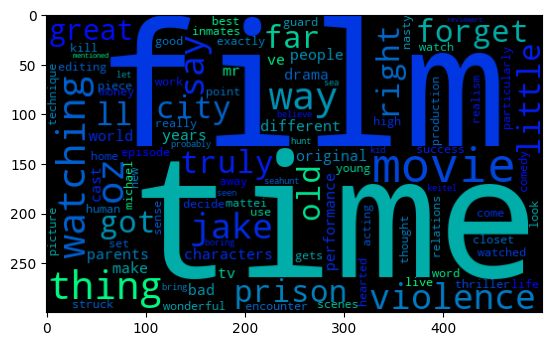

In [12]:
plt.imshow(image)

# Vectorize or Embeddings 


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec


In [16]:
tfidf = TfidfVectorizer()
X_ftidf = tfidf.fit_transform(cleaned_feature)

In [17]:
X_ftidf[0].toarrayrray()

array([[0., 0., 0., ..., 0., 0., 0.]], shape=(1, 253999))

In [18]:
tokens = [docs.split() for docs in cleaned_feature]

w2v_model = Word2Vec(
    sentences = tokens, 
    vector_size = 200, 
    window = 4, 
    min_count=2
)

In [26]:
from gensim import downloader 

google_word2vec_model = downloader.load("word2vec-google-news-300")

In [27]:
google_word2vec_model

In [21]:
w2v_modelv_model.wv[tokens[0][0]]

array([-0.08818243,  0.10410966, -0.94022876,  0.5022326 ,  0.7732578 ,
        0.59532213,  0.07113642,  0.200543  , -0.48351502,  0.10943375,
       -0.46073595, -0.46666184,  0.23543948, -0.2568098 , -0.29883042,
       -0.0475681 ,  0.4068642 , -0.75770235, -0.01267636, -0.8440661 ,
        0.09317794,  0.7238905 , -0.3054255 ,  0.48288348,  0.2130678 ,
       -0.5054967 , -0.36575374, -0.65190345, -0.8229444 , -0.0224126 ,
        0.6110729 , -0.29253525, -0.27777776, -1.5647907 , -0.32656458,
        0.9054697 , -0.57492775, -0.38679862, -0.3358489 , -1.012845  ,
        0.18970788,  0.93370384, -0.15488051,  0.8006194 ,  0.6476544 ,
        0.28858203,  0.23117612, -0.37567613,  0.13118921,  0.93572545,
       -0.05263121, -0.30327028,  0.04976577,  0.42171842,  0.31602296,
       -0.09708434, -0.8142226 , -0.44401342, -1.2855966 ,  0.06045901,
       -0.383988  ,  0.2176797 ,  0.14962262, -0.22916597,  0.09435724,
       -0.2675354 ,  0.08308795,  1.020026  , -0.07507993,  0.93

In [30]:
tokens[0][0]

'reviewers'

In [31]:
def vectorize(tokens, model):
    vectorizectors = [
        model[word] for word in token if word in model
    ]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    
    return np.mean(vectors, axis=0)

In [35]:
def vectorize(tokens, model):
    vectors = [model[word] for word in tokens if word in model]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

embeddings = np.array([
    vectorize(token, w2v_model.wv) for token in tokens
])


In [37]:
embeddings.shape


(49582, 200)

In [24]:
res = vectorize(tokens[0], w2v_modelv_model.wv)

['reviewers',
 'mentioned',
 'watching',
 'justoz',
 'episode',
 'll',
 'hooked',
 'right',
 'exactly',
 'happened',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'trust',
 'faint',
 'hearted',
 'timid',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'aryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'far',
 'away',
 'say',
 'main',
 'appeal',
 'fact',
 'goes',
 'shows',
 'wouldndare',
 'forget',
 'pretty',
 'pictures',
 'painted',
 'mainstream',
 'audiences

In [40]:
pd.DataFrame(embeddings)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.121143,-0.001881,-0.072896,0.038120,0.159349,-0.156249,0.122988,0.765386,-0.234769,0.083485,...,0.106824,-0.003318,-0.010551,-0.254950,0.141557,0.120446,0.111046,-0.288479,-0.012616,-0.130206
1,-0.085223,-0.091763,-0.276011,0.274570,0.352574,-0.354207,-0.008712,0.483333,-0.228535,0.020429,...,-0.030223,-0.202793,-0.434871,-0.266677,0.017125,0.268381,0.095555,0.140202,-0.223416,-0.042936
2,-0.139816,-0.039148,-0.094472,0.184889,0.138102,-0.329951,0.176868,0.473289,-0.321332,0.009148,...,0.002058,0.076667,-0.318346,-0.112672,0.298532,0.143287,0.064162,-0.132534,-0.062542,-0.103382
3,-0.225738,0.051323,-0.075023,0.038543,0.111706,-0.220018,0.227759,0.633786,-0.285364,-0.025243,...,-0.059782,-0.011008,-0.272847,-0.298800,0.275714,0.021890,-0.033408,-0.109161,-0.138739,-0.166730
4,-0.061620,0.036561,-0.075035,0.092550,0.130113,-0.502907,0.146112,0.443432,-0.318196,0.113876,...,0.004999,-0.043415,-0.099556,-0.364534,0.218423,0.301674,0.091625,-0.185814,0.065711,-0.109133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49577,-0.473398,0.016297,0.011923,0.194669,0.217859,-0.431796,-0.015754,0.361494,-0.311847,0.082427,...,-0.132950,0.073798,-0.424988,-0.365464,0.412642,0.146084,-0.015648,0.032731,0.259636,-0.152526
49578,-0.183266,0.091125,-0.038411,0.330411,0.307104,-0.151059,-0.159645,0.424332,-0.143456,0.007377,...,-0.037256,-0.271168,-0.182985,-0.221295,0.068118,0.225119,-0.008603,0.072942,0.192125,-0.187506
49579,-0.188732,0.097229,-0.006605,-0.046920,0.369672,-0.144783,0.247155,0.669350,-0.180725,-0.005242,...,0.231517,0.059582,-0.077957,-0.298766,0.122607,-0.032506,0.148520,-0.285198,-0.055536,-0.313206
49580,-0.063410,0.072380,-0.018515,0.105405,0.128822,-0.233467,-0.050242,0.547061,-0.243528,0.147885,...,0.162304,0.033730,-0.070303,-0.055273,0.159045,0.216224,0.041680,-0.074669,-0.173634,-0.030281


## Classification

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    embeddings, target, test_size=0.2, stratify=target, shuffle=True, random_state=99
)

log_reg = LogisticRegression(max_iter=500, random_state=99)
log_reg.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",99
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

def evaluate(X_test, y_test, model):
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    print(f"Confusion matrix:\n{cm}")
    print(f"Accuracy Score: {acc}")
    print(f"F1 Score: {f1}")




In [45]:
evaluate(X_test, y_test, model=log_reg)

Confusion matrix:
[[4221  719]
 [ 612 4365]]
Accuracy Score: 0.8657860239991934
F1 Score: 0.8677069873770002
